# Ray tracing

Consider the following simplified scenario, where sound propagates through a horizontal layered medium with piece-wise constant sound speed. 

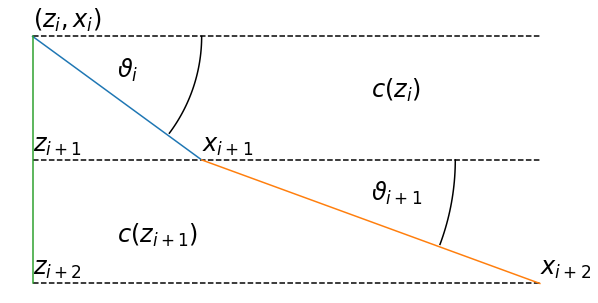

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def draw_arc(xo,yo,r,ang0,ang1):    
    a= np.arange(ang0,ang1)*np.pi/180
    x=xo+r*np.cos(a)
    y=yo+r*np.sin(a)
    plt.plot(x,y,'k')


fig = plt.figure("figure.figsize",[10,5])

plt.plot([0,6],[0,0],'k--')
plt.plot([0,6],[-1.5,-1.5],'k--')
plt.plot([0,6],[-3,-3],'k--')

plt.plot([0,2],[0,-1.5])
plt.plot([2,6],[-1.5,-3])
plt.plot([0,0],[0,-3])

d=0.1
plt.text(0,d,"$(z_i, x_i)$",fontsize=24)
plt.text(0,-1.5+d,"$z_{i+1}$",fontsize=24)
plt.text(0,-3+d,"$z_{i+2}$",fontsize=24)

plt.text(2,-1.5+d,"$x_{i+1}$",fontsize=24);
plt.text(6,-3+d,"$x_{i+2}$",fontsize=24);

plt.text(1,-0.5, r'$\vartheta_{i}$',fontsize=24);
plt.text(4,-2, r'$\vartheta_{i+1}$',fontsize=24);

draw_arc(0,0,2, -36,1)
draw_arc(2,-1.5,3,-20,1)

plt.text(4,-0.75,"$c(z_i)$",fontsize=24);
plt.text(1,-2.5, "$c(z_{i+1})$",fontsize=24);

plt.axis('off');

## Snell's law
When rays transition from one medium to another that are characterized by different sound speeds, the ray propagation angle $\vartheta$ varies according to Snell's law

\begin{equation}
\frac{\cos \vartheta(z)}{c(z)} =  \alpha_0 =\texttt{const}
\end{equation}
This law is simply the consequence that at the interface between two layers the horizontal component of the sound propagation must be the same in both layers. 

Snell's law in other words
\begin{equation}
\cos\vartheta(z) = c(z)\alpha_0
\end{equation}
We note that
\begin{equation}
\sin\vartheta(z)=\sqrt{1-\left( c(z)\alpha_0\right)^2}
\end{equation}

## Differential equations


From this general geometry we observe
\begin{equation}
\tan \vartheta(z)=\frac{dz}{dx}
\end{equation}

\begin{equation}
\sin \vartheta(z)=\frac{dz}{ds}
\end{equation}

The path length is related to the travel time of sound pulses
\begin{equation}
\frac{ds}{dt}=c(z)
\end{equation}

\begin{equation}
\frac{dz}{dt}=\frac{dz}{ds}\frac{ds}{dt}=c(z)\sin\vartheta(z)
\end{equation}


Using Snell's law the different differential equations become

\begin{equation}
\frac{dx}{dz} =\frac{c(z)\alpha_0}{\sqrt{1-(c(z)\alpha_0)^2}}
\end{equation}

\begin{equation}
\frac{dt}{dz} = \frac{1}{c(z)\sqrt{1-(c(z)\alpha_0)^2}}
\end{equation}

## Integration

The ray advance in space and time is estimated by integration of these differential equations
\begin{equation}
x - x_i =\int_{z_i}^{z} \frac{\cos \vartheta(u)}{\sin \vartheta(u)} du
\end{equation}

\begin{equation}
t - t_i = \int_{z_i}^{z} \frac{du}{c(u)\sin \vartheta(u)} 
\end{equation}

To carry out the integration, the sound speed profile $c(z)$ must be specified in more details. In general, these integrals could be integrated numerically, but for some simple special cases a closed form solution of the integral can be given.


Case 1: piece-wise constant sound speed profile:

For a piece-wise constant sound speed profile, that is, for $z\in \left[z_i , z_{i+1}\right[$  we assume
\begin{equation}
c(z)=c(z_i)
\end{equation}


the integrals are straight forward and result to
\begin{align}
x-x_i =& \int_{z_i}^{z} \frac{\cos \vartheta(u)}{\sin \vartheta(u)} du \\
 =& \frac{\cos \vartheta(z_i)}{\sin \vartheta(z_i)}\left(z-z_i\right)
\end{align}

\begin{align}
 t-t_i =& \int_{z_i}^{z} \frac{du}{c(u)\sin \vartheta(u)} \\
=&\frac{\left(z-z_i\right)}{c(z_i)\sin \vartheta(z_i)} 
\end{align}

Case 2: piece-wise linear sound speed profile: 

Very often, however,  it is better to describe the sound-speed by a piece-wise linear profile, that is, for  $z\in \left[z_i , z_{i+1}\right[$   we assume

\begin{equation}
c(z)=c(z_i)+g_i (z-z_i)
\end{equation}

where the sound-speed gradient is assumed to be constant and is given by
\begin{equation}
g_i=\frac{c(z_{i+1})-c(z_i)}{z_{i+1}-z{i}}
\end{equation}
or, equivalently
\begin{equation}
\alpha_0 g_i=\frac{\cos\vartheta(z_{i+1})-\cos \vartheta(z_i)}{z_{i+1}-z{i}}
\end{equation}

The integrals are in this case somewhat more complicated, but follow still basic mathematical methods.
For the integration we define
\begin{equation}
u=a_0c(z)
\end{equation}
so that
\begin{equation}
\frac{du}{dz}=\alpha_0 g_i
\end{equation}
or
\begin{equation}
dz=\frac{1}{\alpha_0g_i}du
\end{equation}
and the using tabled integrals
the integrals become
\begin{align}
 x-x_i =& \int_{z_i}^{z} \frac{\cos \vartheta(u)}{\sin \vartheta(u)} du \\
=& -\frac{1}{\alpha_0 g_i}\left(\sin\vartheta(z)- \sin\vartheta(z_i)\right) 
\end{align}

and
\begin{align}
t-t_i =& \int_{z_i}^{z} \frac{du}{c(u)\sin \vartheta(u)} \\
=& -\frac{1}{g_i}\left(\ln\left( \frac{1+\sin\vartheta(z)}{\cos \vartheta(z)}\right) 
                     - \ln\left( \frac{1+\sin\vartheta(z_i)}{\cos\vartheta(z_i)}\right)\right)
\end{align}

### Propagate acoustic rays
To propagate the acoustic rays through the ocean it turns out that, even if the mathematics are somewhat more complicated, it is more convenient to assume a piece-wise linear and not a piece-wise constant sound speed profile. 
Also it is more intuitive to consider a constant horizontal step size $\Delta x$ and estimate the vertical component of each step. 
This approach differs somewhat from standard textbook approaches where the ray equations are integrated over depth and horizontal progress is estimated. As we will propagate rays also with varying bottom depths and the bottom interaction is difficult to be predicted, the approach chosen here seems more appropriate.

Considering therefore a horizontal step site $\Delta x = x_{i+1}-x_i$ then above equation may be used to estimate the change of ray angle due to advancing the acoustic ray:
\begin{equation}
\sin\vartheta(z_{i+1})=\sin\vartheta(z_i)-{\alpha_0 g_i}\Delta x
\end{equation}
With
\begin{equation}
\cos\vartheta(z_{i+1})=\sqrt{1-\sin^2\vartheta(z_{i+1})}
\end{equation}
and  one estimates the resulting ray depth $z_{i+1}$ as 
\begin{equation}
z_{i+1}=z_i +\frac{1}{\alpha_0 g_i}\left(\cos\vartheta(z_{i+1})-\cos\vartheta(z_i)\right)
\end{equation}
and the travel time $t_{i+1}$
\begin{equation}
t_{i+1}= t_i -\frac{1}{g_i}\left(\ln\left( \frac{1+\sin\vartheta(z_{i+1})}{\cos \vartheta(z_{i+1})}\right) 
                     - \ln\left( \frac{1+\sin\vartheta(z_i)}{\cos\vartheta(z_i)}\right)\right)
\end{equation}

			
### Boundary reflections

If sound rays arrive at a discontinuity in the sound speed profile (e.g. at the surface or bottom, where the sound speed in the bottom is significantly different than the sound speed in water, then sound is not only refracted but also reflected as sketched in next figure.


### Surface reflection
Assume that boundary is flat as it happens with a calm surface then, by virtue of the reflection the ray elevation angle simply changes its sign, or equivalently

\begin{equation}
\sin\vartheta_b = -\sin\vartheta_0
\end{equation}
and the new ray depth becomes
\begin{equation}
z_{i+1} = -\left(z_i +\frac{1}{\alpha_0 g_i}\left(\cos\vartheta(z_{i+1})-\cos\vartheta(z_i)\right)\right)
\end{equation}

## Bottom reflection
If, however the boundary has a slope, at it happens typically at the bottom, then the ray elevation angle not simply changes the sign but more generally its value as sketched in following figure. In such situations the location of  the boundary intercept point is of importance.

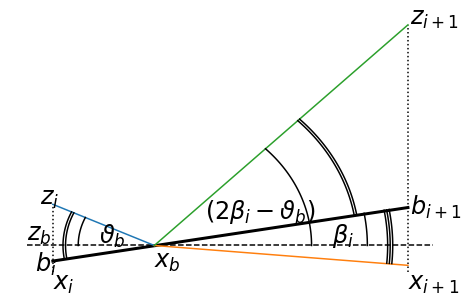

In [23]:
fig = plt.figure("figure.figsize",[8,5])

plt.plot([-0.5,7.5],[0,0],'k--')
plt.plot([0,0],[-0.6,0.9326],'k:')
plt.plot([7,7],[-0.6,5],'k:')

plt.plot([0,7],[-0.3527,0.86],'k',linewidth=3)
plt.plot([0,2],[0.9326,0])
plt.plot([2,7],[0,-0.45])
plt.plot([2,7],[0,5])

plt.text(-0.25,0.9326,"$z_i$",fontsize=24)
plt.text(7.05,5,"$z_{i+1}$",fontsize=24)
plt.text(-0.5,0.1,"$z_b$",fontsize=24)
plt.text(-0.35,-0.6,"$b_i$",fontsize=24)
plt.text(7.05,0.7,"$b_{i+1}$",fontsize=24)

plt.text(0,-1,"$x_i$",fontsize=24)
plt.text(7,-1,"$x_{i+1}$",fontsize=24)
plt.text(2,-0.5,"$x_b$",fontsize=24)

plt.text(0.9,0.05,r'$\vartheta_b$',fontsize=24)
plt.text(3,0.6,r'$(2\beta_i -\vartheta_b)$',fontsize=24)
plt.text(5.5,0.05,r'$\beta_i$',fontsize=24)

draw_arc(2,0,3.1,0, 46)
draw_arc(2,0,1.5,155,181)

draw_arc(2,0,4.2,0,11)

draw_arc(2,0,1.75,155,191)
draw_arc(2,0,1.80,155,191)
draw_arc(2,0,4,10,46)
draw_arc(2,0,4.05,10,46)

draw_arc(2,0,4.6,-5,11)
draw_arc(2,0,4.65,-5,11)
draw_arc(2,0,4.7,-5,11)

plt.axis('off');

In this figure, the ray arrives the bottom depth $z_b$ with an ray-angle $\vartheta_b$ (measured with respect to the horizontal) and leaves after reflection with the ray-angle $2\beta_i -\vartheta_b$

A part of the acoustic energy gets refracted into the new layer, but another, in most cases significant amount of acoustic energy gets reflected back into the same layer.

In these cases, the vertical excursion of the ray (integration boundaries) must be limited to $z = z_b$ and the ray parameters must be modified to describe the new, now reflected, ray.

### Boundary intercept
To determine the intercept point of the ray with the bottom, one considers the two equations that describe the bottom and the ray path. Assuming a piece-wise linear bottom

\begin{equation}
z_b=b_i+(x_b-x_i)\tan\beta_i
\end{equation}
and 
\begin{equation}
z_b=z_i +\frac{1}{\alpha_0 g_i}\left(\cos\vartheta(z_b)-\cos\vartheta(z_i)\right)
\end{equation}
an ray-bottom intercept location $x_b$ should satisfy the following equation
\begin{equation}
b_i+(x_b-x_i)\tan\beta_i=
z_i +\frac{1}{\alpha_0 g_i}\left(\cos\vartheta(z_b)-\cos\vartheta(z_i)\right)
\end{equation}
that is, 
\begin{equation}
b_i-z_i =
\frac{1}{\alpha_0 g_i}\left(\cos\vartheta(z_b)-\cos\vartheta(z_i)\right) 
-(x_b-x_i)\tan\beta_i
\end{equation}
where 
\begin{equation}
\cos\vartheta(z_b)=\sqrt{1-\sin^2\vartheta(z_b)}
\end{equation}
and
\begin{equation}
\sin\vartheta(z_b)=\sin\vartheta(z_i)-\alpha_0 g_i (x_b-x_i)
\end{equation}
The solution of this equation  depends only on the variable $x_v = x_b-x_i$ and is obtained with sufficient accuracy by linear interpolation.

### Reflected ray
 To estimated the reflected ray, first the incidence angle $\vartheta_b$ is estimated
\begin{equation}
\vartheta_b = \sin^{-1}\left(\sin\vartheta(z_b)\right)
\end{equation}

\noindent Let $\beta_i$ be the slope angle of the bottom
\begin{equation}
\beta_i = \tan^{-1}\left(\frac{db}{dx}\right)
\end{equation}

\noindent then the reflected ray angle becomes
\begin{equation}
\vartheta_b \Longrightarrow 2\beta_i -\vartheta_b
\end{equation}

\noindent and consequently, the new ray constant becomes
\begin{equation}
\alpha_b =\frac{\cos \vartheta_b}{c(z_i)}
\end{equation}

To continue the ray path, ray end location and associated ray elevation angle are estimated according to
\begin{equation}
\sin\vartheta(z_{i+1}) = \sin\left(2\beta_i-\vartheta(z_b)\right)
-\alpha_b g_i \left(x_{i+1}-x_b \right)
\end{equation}

\begin{equation}
z_{i+1} = z_b + \frac{1}{\alpha_b g_i}\left(\cos \vartheta(z_{i+1}) - \cos (2\beta_i-\vartheta(z_b ))\right)
\end{equation}
### Refracted ray and critical angle
As indicated in above figure not all sound energy is reflected on the boundary but some sound still penetrates the boundary layer. Obviously a new ray angle $\vartheta_t$ is determined by Snell's law and therefore

\begin{equation}
\cos(\beta_i-\vartheta_t)=\frac{c_b}{c(z_b)}\cos(\beta_i-\vartheta_b )=c_b\alpha_0
\end{equation}
However, no sound will penetrate the bottom, if for a given ray parameter $\alpha_0$ the product $c_b\alpha_0$ exceeds the value of 1, or in other words if $\vartheta_b$ is less than a  critical angle $\vartheta_c$ such that
\begin{equation}
\cos(\beta_i-\vartheta_c )=\frac{c(z_b)}{c_b}
\end{equation}
or
\begin{equation}
\vartheta_c=\beta_i-\cos^{-1}\left(\frac{c(z_b)}{c_b}\right)
\end{equation}

As one may assume that the sound speed in the bottom layer $c_b$ is constant, the ray will propagate in the bottom layer according to
\begin{equation}
\vartheta_t=\beta_i-\cos^{-1}\left(c_b\alpha_0\right)
\end{equation}

\begin{equation}
z_{i+1}=z_b+\frac{\sin\vartheta_t}{\cos\vartheta_t}\left(x_{i+1}-x_i\right)
\end{equation}

## Python code

In [24]:
import numpy as np

def toInt(x): 
    return np.abs(x).astype(np.int32)

def trInt(c1,s1,c2,s2): return np.log((1+s2)/c2*c1/(1+s1)) 

def findBottomIntercept(s1,c1,p1,agi,bot1,tnb):
    xv=np.arange(0,1,0.01);
    S=s1-agi*xv; 
    
    zbot=bot1+xv*tnb;
    zp=p1+(np.sqrt(1-S**2)-c1)/agi;
    xb=interp1(0.0,-(zp-zbot)[0],xv);

    zb=bot1+xb*tnb;
    ssb1=s1-agi*xb;  
    ccb1=np.sqrt(1-ssb1**2);

    return zb,xb,ssb1,ccb1

def interp1(xv,xp,yp): return np.interp(-xv,-xp,yp);

def ray_tracing(th,hh,xx,bot,cv):
    giz=(cv[1:,1]-cv[:-1,1])/(cv[1:,0]-cv[:-1,0])
    #giz=np.diff(cv[:,1],1,0)/np.diff(cv[:,0],1);

    tha=np.array(th)*np.pi/180
    ao=np.cos(tha)/interp1(hh,cv[:,0],cv[:,1]);
    
    ss=np.zeros((len(xx),len(th)));
    cc=np.zeros((len(xx),len(th)));
    pp=np.zeros((len(xx),len(th))); 
    gi=np.zeros((len(xx),len(th)));
    tr=np.zeros((len(xx),len(th)));
    
    ss[0,:]=np.sin(tha); 
    cc[0,:]=np.cos(tha);
    pp[0,:]=hh;
    gi[0,:]=np.abs(ao)*interp1(pp[0,:],cv[1:,0],giz);
    
    for ii in range(1,len(xx)):
            agi=ao*interp1(pp[ii-1,:],cv[:-1,0],giz);
            ss[ii,:] = ss[ii-1,:]-agi;  
            cc[ii,:] = np.sqrt(1-ss[ii,:]**2);
            tr[ii,:] = tr[ii-1,:]-ao/agi*trInt(cc[ii-1,:],ss[ii-1,:],
                                               cc[ii,:],ss[ii,:]);
            pp[ii,:] = pp[ii-1,:]+(cc[ii,:]-cc[ii-1,:])/agi;      
            #
            ibs=np.where(pp[ii,:]>=0);
            if np.shape(ibs)[1]>0:
                ss[ii,ibs]=-ss[ii-1,ibs];
                pp[ii,ibs]=-pp[ii,ibs];
            #
            ibb=np.where(pp[ii,:]<=bot[ii]);
            if np.shape(ibb)[1]>0:
                agi=gi[ii-1,ibb];
                tnb=(bot[ii]-bot[ii-1])/1;
                
                # find bottom intercept
                zb,xb,ssb1,ccb1 = findBottomIntercept(ss[ii-1,ibb],cc[ii-1,ibb],
                                                      pp[ii-1,ibb],agi,bot[ii-1],tnb);
                #ray on bottom
                trb=tr[ii-1,ibb]-ao[ibb]/agi*trInt(cc[ii-1,ibb],ss[ii-1,ibb],
                                                   ccb1,ssb1); 
                #soundspeed at bottom
                cb=np.interp(-zb,-cv[:,0],cv[:,1]);

                thb=np.arctan(tnb); 
                th1=np.arcsin(ssb1); 
                th2=2*thb-th1;

                ssb2=np.sin(th2); ccb2=np.cos(th2);
                ao[ibb]=ccb2/cb;
                agi=ao[ibb]*interp1(zb,cv[1:,0],giz);

                ss[ii,ibb]=ssb2-agi*(1-xb); 
                cc[ii,ibb]=np.sqrt(1-ss[ii,ibb]**2);

                pp[ii,ibb]=zb+(cc[ii,ibb]-ccb2)/agi;
                tr[ii,ibb]=trb-ao[ibb]/agi*trInt(ccb2,ssb2,
                                                 cc[ii,ibb],ss[ii,ibb]);            
            gi[ii,:]=agi;
    return pp,tr


## Test example

For the test example first a sound speed is converted from digitized picture to numbers. Three rays were then generated on a bottom slope from a deep receiver location to a distant sound source. 

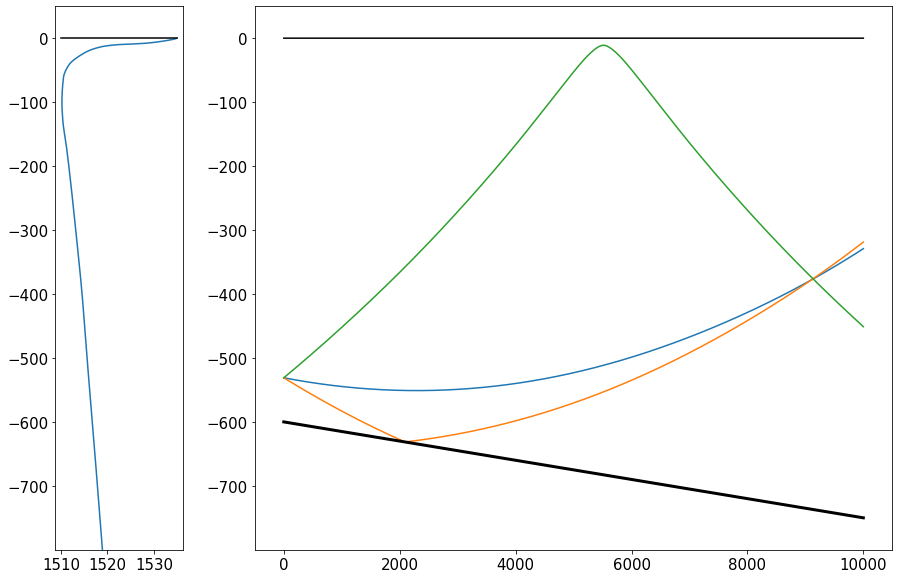

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.interpolate as interpolate

plt.rc('font', size=15)

# digitized soundspeed
gg=np.array([ 
       [47.0000,  381.0192],
       [47.0000,   20.6859],
      [475.4444,  381.0192],
       [47.0000,   30.3269],
       [50.7991,   81.5449],
       [53.1171,  142.4038],
       [54.0442,  202.6603],
       [56.8258,  262.3141],
       [66.0975,  322.5705],
       [77.2236,  358.1218],
       [90.6676,  373.7885],
      [118.4828,  378.6090],
      [137.4898,  376.1987],
      [168.5501,  364.7500],
      [190.3387,  357.5192],
      [260.3403,  337.0321],
      [332.1962,  317.7500],
      [403.5885,  302.6859],
      [473.5901,  287.0192]]);

# generate sound speed profile
D1=np.interp(gg[3:,0],np.array([gg[3,0],gg[2,0]]),np.array([0,600]));
C1=np.interp(gg[3:,1],np.array([gg[3,1],gg[2,1]]),np.array([1535,1510]));
D1=np.append(D1,1000)
C1=np.append(C1,1521)

#interpolate 
dz=np.arange(1000)
cv=np.array([-dz,interpolate.pchip_interpolate(D1,C1,dz)]).T

th=[-1.0, -3.2, 4.3]; # ray angles
hh=-531.0; # receiver depth

xx=np.arange(10000);
bot=-600-1.5e-2*xx;

pp,tr=ray_tracing(th,hh,xx,bot,cv);

fig = plt.figure("figure.figsize",[15,10])
ax = plt.gca()
divider = make_axes_locatable(ax)
ax2 = divider.append_axes("left", size="20%", pad=1)

ax2.plot(cv[:,1],cv[:,0]);
ax2.plot([1510,1535],[0,0],'k');

ax.plot(xx,pp);
ax.plot(xx,bot,'k',linewidth=3);
ax.plot(xx,0*xx,'k');

ax.set_ylim(min(bot-50),50);
ax2.set_ylim(min(bot-50),50);